In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Data Connectivity

In [88]:
Dataset=pd.read_csv('C:\\Users\\Hp\\Desktop\\Insurance\\Insurance.csv')

In [36]:
Dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [37]:
Dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EXPLORATORY DATA ANALYSIS

In [5]:
# Total 1338 rows and 7 columns including the target variable- shape is an attribute n pdandas dataframe
Dataset.shape

(1338, 7)

In [56]:
# to get  information on data  and object type
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
## 3 Categorical varibale and 4 Numeric variable

In [8]:
# to check if there is nay missing values
Dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [39]:
# statistical FIndings  of the dataset-  for all numeric caolumn
Dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
# To see the distribution of age

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


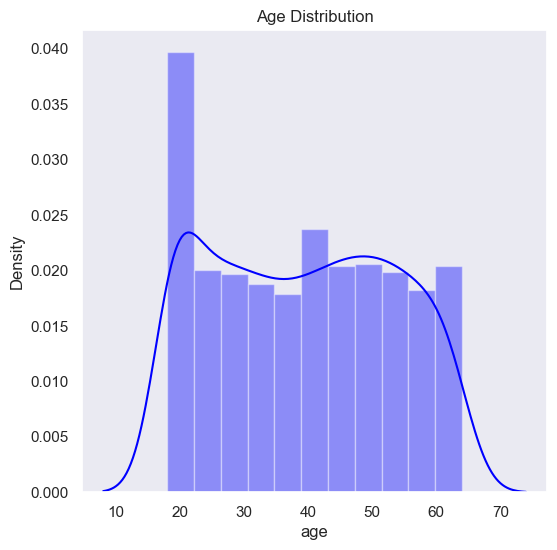

In [57]:
sns.set(style="dark",color_codes=True)
plt.figure(figsize=(6,6))
sns.distplot(Dataset['age'],kde=True, color='blue')
plt.title('Age Distribution')
plt.show()

<AxesSubplot:xlabel='age'>

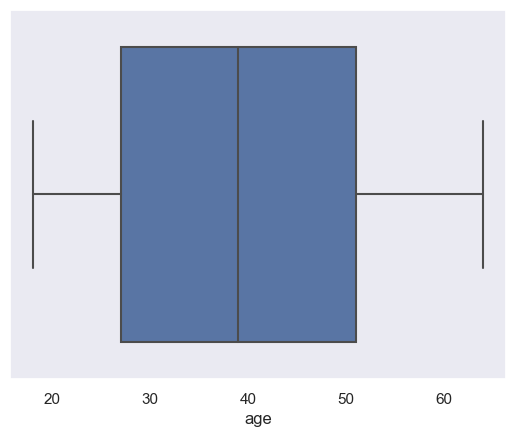

In [58]:
sns.boxplot(x=Dataset["age"])

In [13]:
#The Age of the insured approximately follow a uniform distribution with Mean of 39.2 and Median of 39.0, 
#and with lowest age being 18 and highest being 64.
#There are no outlier values in the Age distribution in the data.

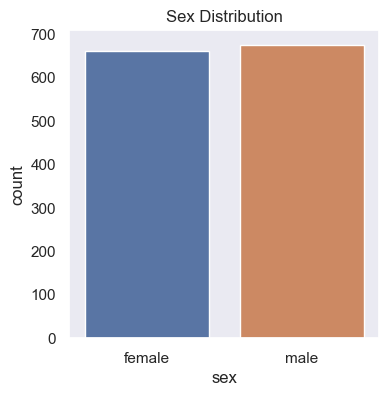

In [59]:
# Gender column to see the distributiData, count of categorical variable

plt.figure(figsize=(4,4))
sns.countplot(x='sex', data=Dataset)
plt.title('Sex Distribution')
plt.show()

In [15]:
#The dataset is almost evenly distributed among genders, with 676 Males (50.5%) and 662 Fenales (49.5%).

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


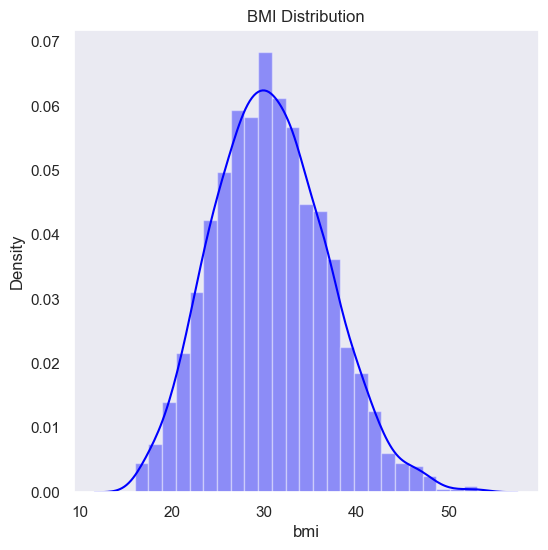

In [60]:
#BMI Distribution
sns.set(style="dark",color_codes=True)
plt.figure(figsize=(6,6))
sns.distplot(Dataset['bmi'],kde=True, color='blue')
plt.title('BMI Distribution')
plt.show()

<AxesSubplot:xlabel='bmi'>

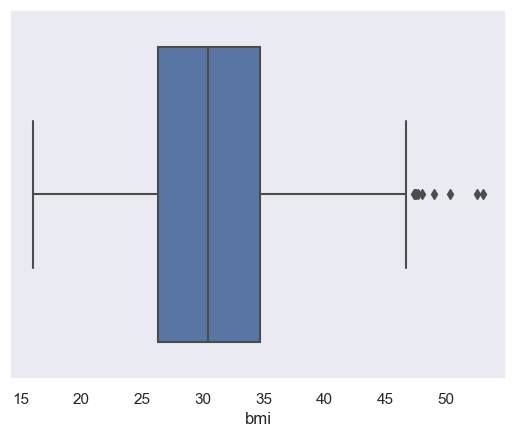

In [61]:
sns.boxplot(x=Dataset["bmi"])

In [18]:
##The BMI distribution of the Insured approximately follows a normal distribution with a Mean of 30.66 and Median of 30.4.
#There are a total of 9 outlier values in the BMI distribution, all in the higher side. The highest BMI observed is 53.13.

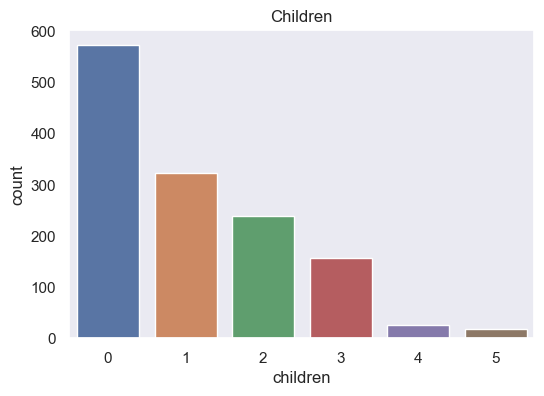

In [62]:
# more number of people doesnot have any children,
plt.figure(figsize=(6,4))
sns.countplot(x='children', data=Dataset)
plt.title('Children')
plt.show()

<AxesSubplot:ylabel='None'>

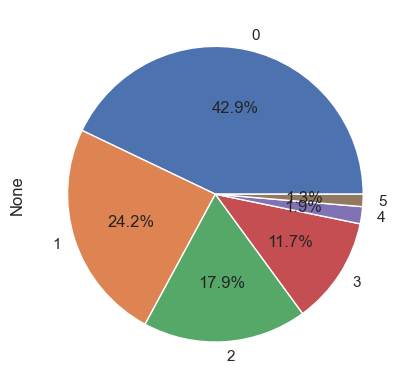

In [63]:

#Dataset.groupby(['children']).agg('count')['age']
Dataset.groupby('children').size().plot(kind='pie', autopct='%1.1f%%')

In [21]:
#In the dataset, approximately 85% (1138 / 1338) of the insured have less than 3 children.

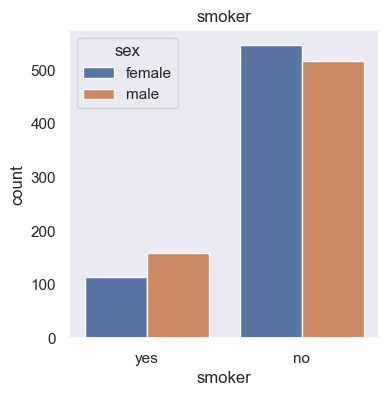

In [64]:
plt.figure(figsize=(4,4))
sns.countplot(x='smoker',hue='sex', data=Dataset)
plt.title('smoker')
plt.show()

<AxesSubplot:xlabel='smoker', ylabel='charges'>

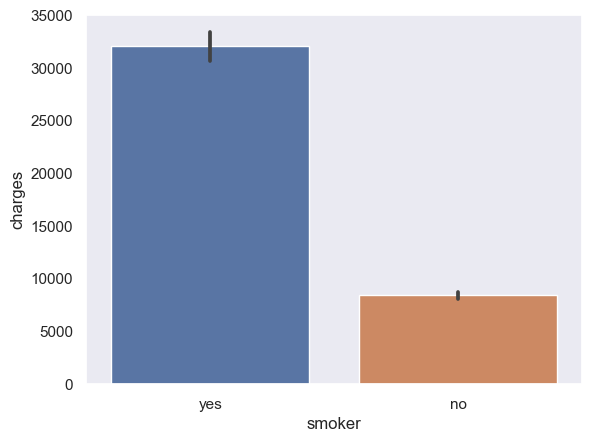

In [65]:
sns.barplot(x = "smoker", y = "charges", data = Dataset)

In [24]:
#Average premium charges for smokers are indeed significantly higher than non-smokers.

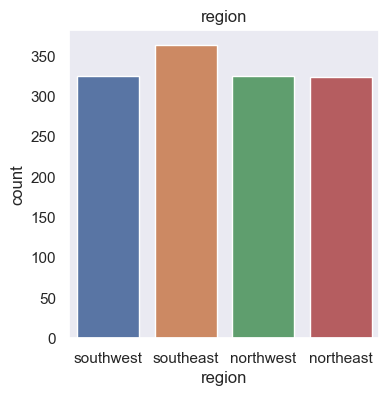

In [66]:
plt.figure(figsize=(4,4))
sns.countplot(x='region', data=Dataset)
plt.title('region')
plt.show()

In [26]:
#All four regions are represented approximately evenly in the dataset.

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


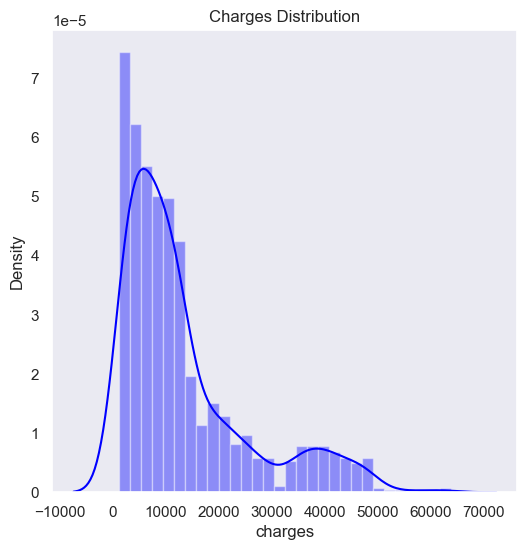

In [67]:
# distribution of charges value
sns.set(style="dark",color_codes=True)
plt.figure(figsize=(6,6))
sns.distplot(Dataset['charges'],kde=True, color='blue')
plt.title('Charges Distribution')
plt.show()

<AxesSubplot:xlabel='charges'>

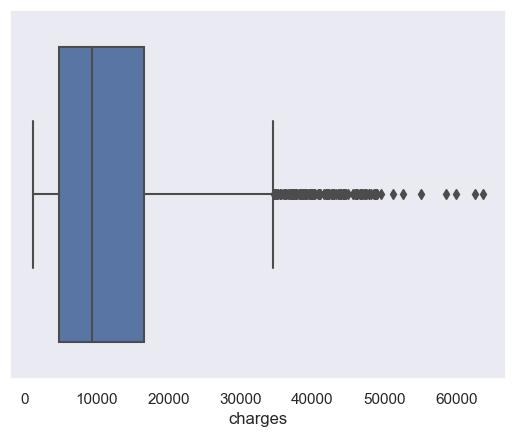

In [68]:
sns.boxplot(x=Dataset["charges"])

In [29]:
#Total number of outliers in charges distribution: 139.
#The person with the highest BMI (obese, or least healthy, based on available data) 
#is also one of the youngest (male, 18, non-smoker.) 
#He is paying less premium charges than the mean(which, we note, is affected by extreme outlier values of charges 
#like the person above), but significantly more than the median. 
#This is in line with our basic understanding of underwriting rules.

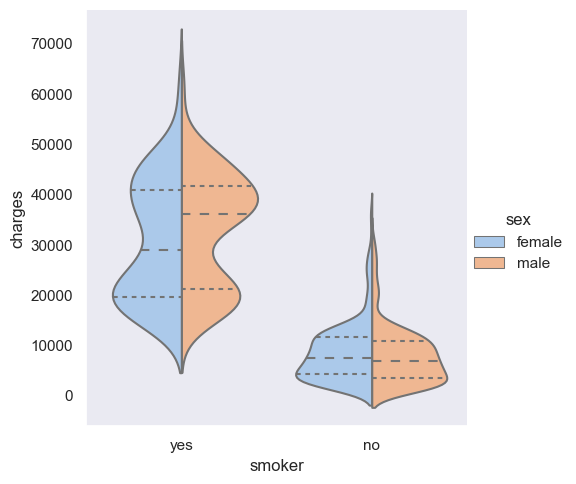

In [69]:
sns.catplot(x="smoker", y="charges", hue="sex",
            kind="violin", inner="quartiles", split=True,
            palette="pastel", data=Dataset)

In [ ]:
#Of the total 1338 insured, 274 (20.5%) are smokers and the rest are non-smokers.
#Among 274 smokers, proportion of males (159) are higher than females (115).
#The average insurance premium for smokers are significantly higher than non-smokers.

In [32]:
Dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


# Correlation

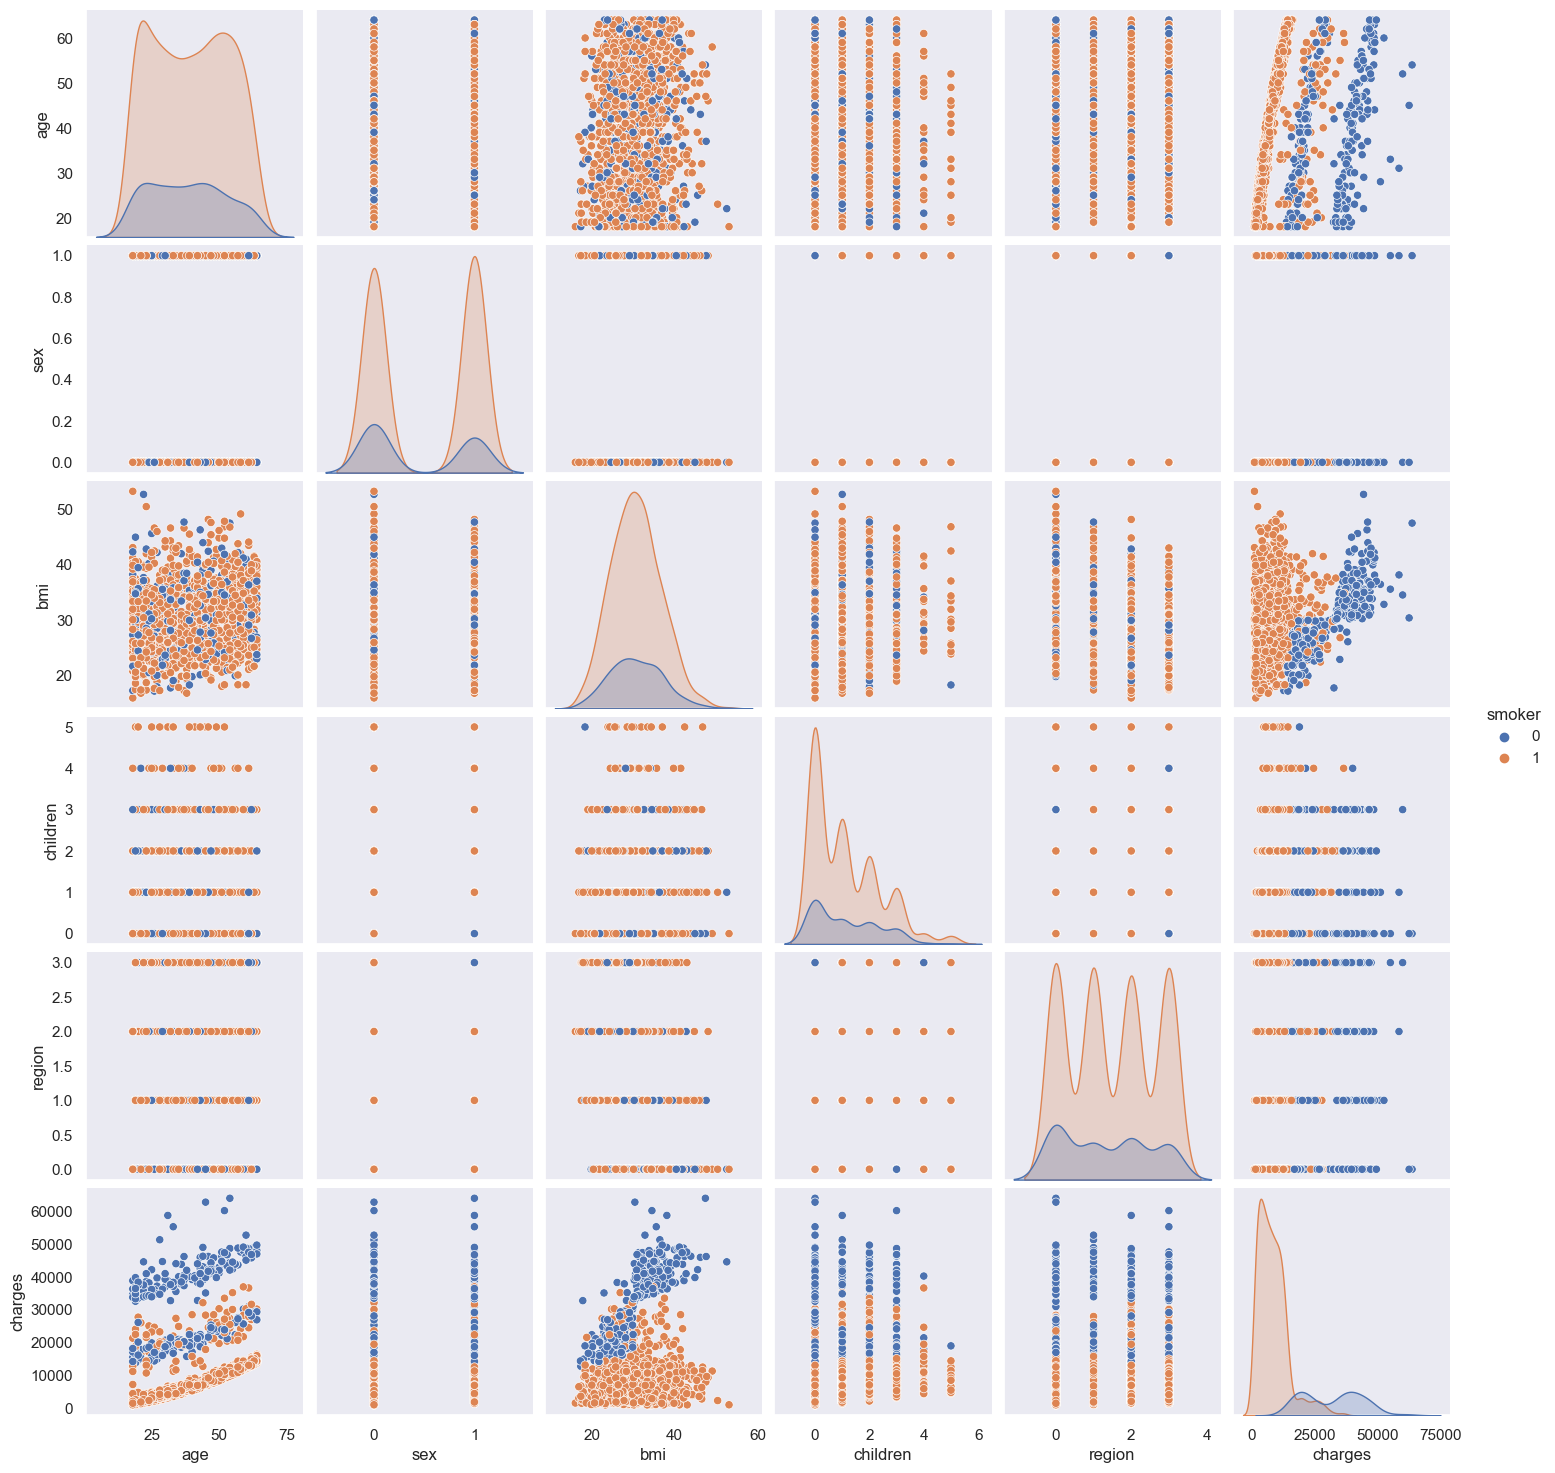

In [51]:
sns.pairplot(Dataset, hue  = 'smoker')

<AxesSubplot:xlabel='age', ylabel='charges'>

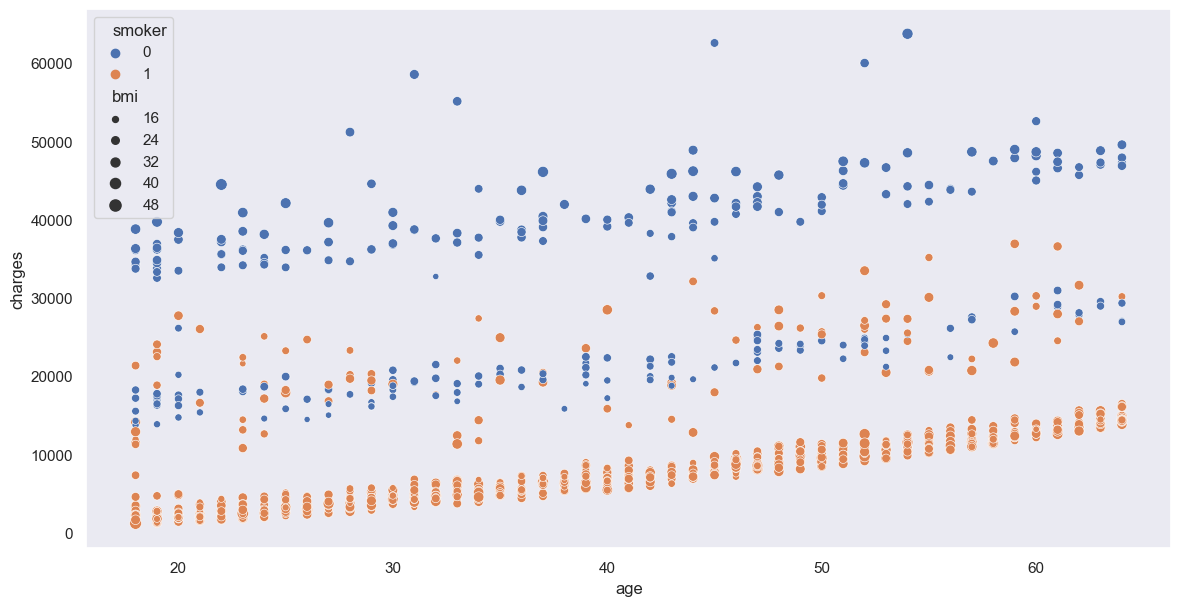

In [85]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=Dataset['age'], y=Dataset['charges'],hue=Dataset['smoker'],size=Dataset['bmi'])

<AxesSubplot:xlabel='bmi', ylabel='charges'>

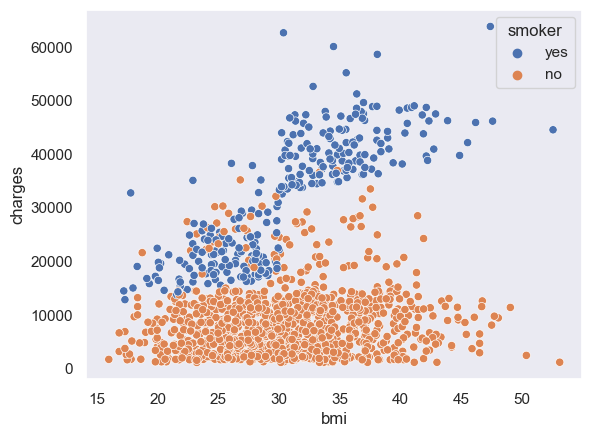

In [89]:
sns.scatterplot(x=Dataset['bmi'], y=Dataset['charges'], hue=Dataset['smoker'])

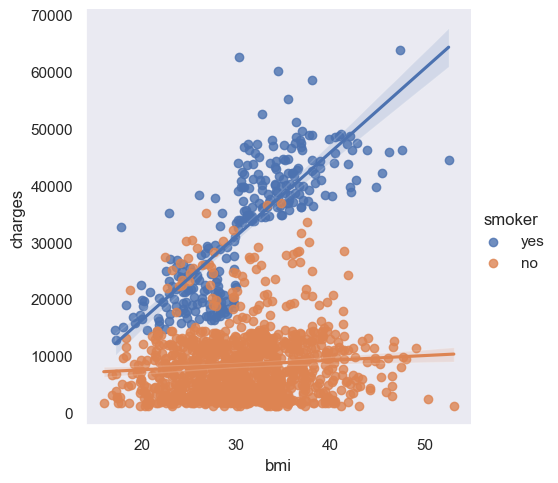

In [92]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=Dataset)

In [ ]:
This scatter plot shows that nonsmokers tend to pay slightly more with increasing BMI, smokers pay MUCH more.
( The plot shows the regression line of smokers has a much steeper slope when compared to line of nonsmokers!)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='smoker', ylabel='charges'>

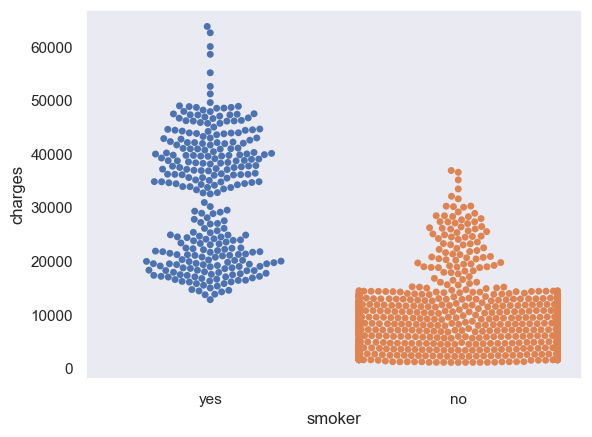

In [94]:
sns.swarmplot(x=Dataset['smoker'],
              y=Dataset['charges'])

In [ ]:
The Swarm plot shows us that: on average, non-smokers are charged less than smokers, and
the customers who pay the most are smokers; whereas the customers who pay the least are non-smokers.

In [ ]:
# As ML does not understand the text values, we need to convert the categorical variable onto numeric value by one hot encoding
Dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)
Dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
Dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [76]:
# need to split the  feature independent and dependent variable
X=Dataset.drop(columns='charges',axis=1)
y=Dataset['charges']

In [ ]:
x

In [ ]:
y

In [ ]:
# need to split dataset into trainig and testing

In [105]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
lin_reg = LinearRegression()

In [108]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [109]:
pred = lin_reg.predict(X_test)
predtrain= lin_reg.predict(X_train)

In [110]:
from sklearn.metrics import r2_score
r2_score(y_test, pred),r2_score(y_train, predtrain)

(0.783021587162344, 0.7413131194887537)

In [111]:
# after model creation the prediction values
Dataset1 = pd.DataFrame({'Actual':y_test,'Predicted':pred})
Dataset1

,Actual,Predicted
764,9095.06825,8597.284895
887,5272.17580,7231.743882
890,29330.98315,37039.232090
1293,9301.89355,9616.212129
259,33750.29180,27161.155047
...,...,...
109,47055.53210,39017.518638
575,12222.89830,11922.482922
535,6067.12675,7316.166925
543,63770.42801,40853.403071


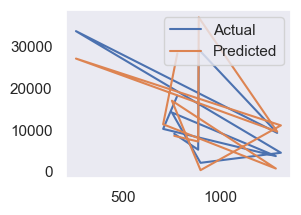

In [115]:
plt.subplot(221)
plt.plot(Dataset1['Actual'].iloc[0:11],label='Actual')
plt.plot(Dataset1['Predicted'].iloc[0:11],label='Predicted')
plt.tight_layout
plt.legend()

In [ ]:
#Evaluation of Model

In [116]:
metrics.mean_absolute_error(y_test,pred)

4190.220190137915

In [122]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, pred, squared=False)


5803.931715151759